In [1180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import seaborn as sns
import joblib

In [1181]:
data = pd.read_csv('./hanoiweather.csv', index_col="datetime")

In [1182]:
data

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
1990-01-01,Hà Nội,15.9,13.4,14.6,15.9,13.4,14.6,14.0,96.3,NaN,...,NaN,NaN,NaN,1990-01-01T06:33:41,1990-01-01T17:26:18,0.14,Overcast,Cloudy skies throughout the day.,cloudy,48820099999
1990-01-02,Hà Nội,17.4,14.6,16.1,17.4,14.6,16.1,13.7,85.9,NaN,...,NaN,NaN,NaN,1990-01-02T06:34:00,1990-01-02T17:26:56,0.18,Overcast,Cloudy skies throughout the day.,cloudy,48820099999
1990-01-03,Hà Nội,18.2,16.1,16.8,18.2,16.1,16.8,13.8,82.5,NaN,...,NaN,NaN,NaN,1990-01-03T06:34:18,1990-01-03T17:27:34,0.22,Overcast,Cloudy skies throughout the day.,cloudy,48820099999
1990-01-04,Hà Nội,19.6,15.2,16.4,19.6,15.2,16.4,14.3,88.2,NaN,...,NaN,NaN,NaN,1990-01-04T06:34:35,1990-01-04T17:28:12,0.25,Overcast,Cloudy skies throughout the day.,cloudy,48820099999
1990-01-05,Hà Nội,18.1,15.4,16.9,18.1,15.4,16.9,15.8,93.8,NaN,...,NaN,NaN,NaN,1990-01-05T06:34:51,1990-01-05T17:28:51,0.29,Overcast,Cloudy skies throughout the day.,cloudy,48820099999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-12,Hà Nội,34.0,24.6,28.5,43.5,24.6,33.1,25.5,84.8,17.168,...,19.8,7.0,60.0,2024-05-12T05:20:10,2024-05-12T18:26:03,0.13,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"48820099999,48823099999,48825099999,4883109999..."
2024-05-13,Hà Nội,30.1,23.0,26.7,33.9,23.0,28.5,22.9,80.9,142.584,...,23.7,10.0,10.0,2024-05-13T05:19:44,2024-05-13T18:26:28,0.16,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"48820099999,48823099999,48825099999,4883109999..."
2024-05-14,Hà Nội,32.0,24.0,28.0,37.8,24.0,31.0,23.8,78.7,0.900,...,21.0,9.0,30.0,2024-05-14T05:19:18,2024-05-14T18:26:54,0.20,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"48820099999,48823099999,48825099999,4883109999..."


### Xử lý dữ liệu

In [1183]:
features = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',]

In [1184]:
data = data.dropna(axis='columns',thresh=12000)
data = data[features]
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12435 entries, 1990-01-01 to 2024-05-16
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           12435 non-null  float64
 1   tempmin           12435 non-null  float64
 2   temp              12435 non-null  float64
 3   feelslikemax      12435 non-null  float64
 4   feelslikemin      12435 non-null  float64
 5   feelslike         12435 non-null  float64
 6   dew               12435 non-null  float64
 7   humidity          12435 non-null  float64
 8   windspeed         12435 non-null  float64
 9   winddir           12435 non-null  float64
 10  sealevelpressure  12435 non-null  float64
 11  cloudcover        12435 non-null  float64
 12  visibility        12435 non-null  float64
dtypes: float64(13)
memory usage: 1.3+ MB


In [1185]:
data

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility
datetime,,,,,,,,,,,,,
1990-01-01,15.9,13.4,14.6,15.9,13.4,14.6,14.0,96.3,7.2,24.1,1015.9,100.0,10.0
1990-01-02,17.4,14.6,16.1,17.4,14.6,16.1,13.7,85.9,7.2,25.0,1019.0,100.0,17.1
1990-01-03,18.2,16.1,16.8,18.2,16.1,16.8,13.8,82.5,7.2,25.0,1019.7,100.0,19.9
1990-01-04,19.6,15.2,16.4,19.6,15.2,16.4,14.3,88.2,7.2,50.0,1019.0,100.0,9.7
1990-01-05,18.1,15.4,16.9,18.1,15.4,16.9,15.8,93.8,3.6,50.0,1018.5,98.6,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-12,34.0,24.6,28.5,43.5,24.6,33.1,25.5,84.8,24.1,103.8,1010.3,70.0,8.6
2024-05-13,30.1,23.0,26.7,33.9,23.0,28.5,22.9,80.9,16.6,326.4,1012.0,56.5,9.5
2024-05-14,32.0,24.0,28.0,37.8,24.0,31.0,23.8,78.7,22.3,123.1,1011.1,42.6,9.8


In [1186]:
# Xử lý nhiễu - Loại bỏ ngoại lệ
def remove_outliers(df, columns):
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        cutoff = std * 5
        lower, upper = mean - cutoff, mean + cutoff
        df = df[(df[column] >= lower) & (df[column] <= upper)]
    return df

data = remove_outliers(data, features)

In [1187]:
data["prediction"] = data.shift(-1)["tempmax"]
data = data.ffill()
data

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,prediction
datetime,,,,,,,,,,,,,,
1990-01-01,15.9,13.4,14.6,15.9,13.4,14.6,14.0,96.3,7.2,24.1,1015.9,100.0,10.0,17.4
1990-01-02,17.4,14.6,16.1,17.4,14.6,16.1,13.7,85.9,7.2,25.0,1019.0,100.0,17.1,18.2
1990-01-03,18.2,16.1,16.8,18.2,16.1,16.8,13.8,82.5,7.2,25.0,1019.7,100.0,19.9,19.6
1990-01-04,19.6,15.2,16.4,19.6,15.2,16.4,14.3,88.2,7.2,50.0,1019.0,100.0,9.7,18.1
1990-01-05,18.1,15.4,16.9,18.1,15.4,16.9,15.8,93.8,3.6,50.0,1018.5,98.6,11.4,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-12,34.0,24.6,28.5,43.5,24.6,33.1,25.5,84.8,24.1,103.8,1010.3,70.0,8.6,30.1
2024-05-13,30.1,23.0,26.7,33.9,23.0,28.5,22.9,80.9,16.6,326.4,1012.0,56.5,9.5,32.0
2024-05-14,32.0,24.0,28.0,37.8,24.0,31.0,23.8,78.7,22.3,123.1,1011.1,42.6,9.8,31.0


In [1188]:
X = data.drop('prediction', axis=1)  # Các biến dự đoán
y = data['prediction']  # Biến mục tiêu

In [1189]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train = X.loc[:"2024-04-30"]
y_train = y.loc[:"2024-04-30"]
X_val = X.loc["2018-01-01":"2024-04-30"]
y_val = y.loc["2018-01-01":"2024-04-30"]
X_test = X.loc["2024-05-01":]
y_test = y.loc["2024-05-01":]

In [1190]:
mse_data = ((data['prediction'] - data['tempmax']) ** 2)
mae_data = abs(data['prediction'] - data['tempmax'])
print(f'MSE: {mse_data.mean()}')
print(f'MAE: {mae_data.mean()}')

MSE: 6.515085414987913
MAE: 1.8739323126510878


In [1191]:
# Thiết lập pipeline gồm các bước: chuẩn hóa và mô hình
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('normalizer', Normalizer()),
    ('ridge', Ridge())
])

In [1192]:
# Thiết lập mô hình Ridge Regression với GridSearchCV để tìm tham số tốt nhất
ridge = Ridge()
param_grid = {'ridge__alpha': [0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('normalizer', Normalizer()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [1193]:
# In ra tham số tốt nhất
best_alpha = grid_search.best_params_['ridge__alpha']
print(f'Tham số điều chỉnh tốt nhất: {best_alpha}')

Tham số điều chỉnh tốt nhất: 0.1


In [1194]:
# Huấn luyện mô hình Ridge Regression với tham số tốt nhất
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [1195]:
# Dự báo trên tập kiểm tra
y_pred = best_ridge.predict(X_test)

In [1196]:
# Đánh giá hiệu suất mô hình
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}')

MAE: 1.563517809089677
MSE: 3.9965402271309864
MAPE: 0.05110634656353946


In [1197]:
combined = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
combined = combined.sort_index()
combined

,Actual,Predicted
datetime,,
2024-05-01,26.2,28.597705
2024-05-02,27.7,26.891255
2024-05-03,33.0,27.921375
2024-05-04,28.7,31.939156
2024-05-05,28.8,28.968040
2024-05-06,30.4,29.072744
2024-05-07,30.0,30.624616
2024-05-08,31.0,30.749533
2024-05-09,31.7,29.415697


In [1198]:
print(y_pred)

[28.59770496 26.89125519 27.92137487 31.939156   28.96804024 29.07274431
 30.62461589 30.74953343 29.41569674 30.78480403 32.60816695 32.0005784
 30.64171538 31.3155199  30.53791977 28.8819593 ]


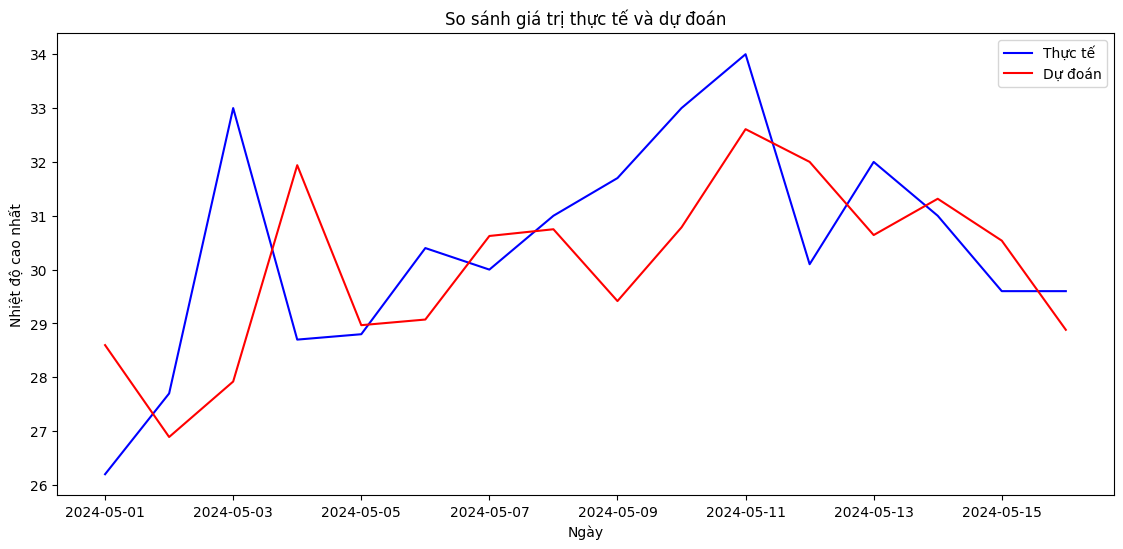

In [1199]:
combined_01_01_2024 = combined.loc["2024-01-01":]
selected_ticks = combined_01_01_2024.index[::2].tolist()

# Biểu đồ so sánh giá trị thực và giá trị dự đoán
plt.figure(figsize=(30, 6))
plt.subplot(1, 2, 1)
plt.plot(combined_01_01_2024["Actual"].values, label='Thực tế', color='blue')
plt.plot(combined_01_01_2024["Predicted"], label='Dự đoán', color='red')
plt.xlabel('Ngày')
plt.ylabel('Nhiệt độ cao nhất')
plt.title('So sánh giá trị thực tế và dự đoán')
plt.xticks(selected_ticks)
plt.legend()


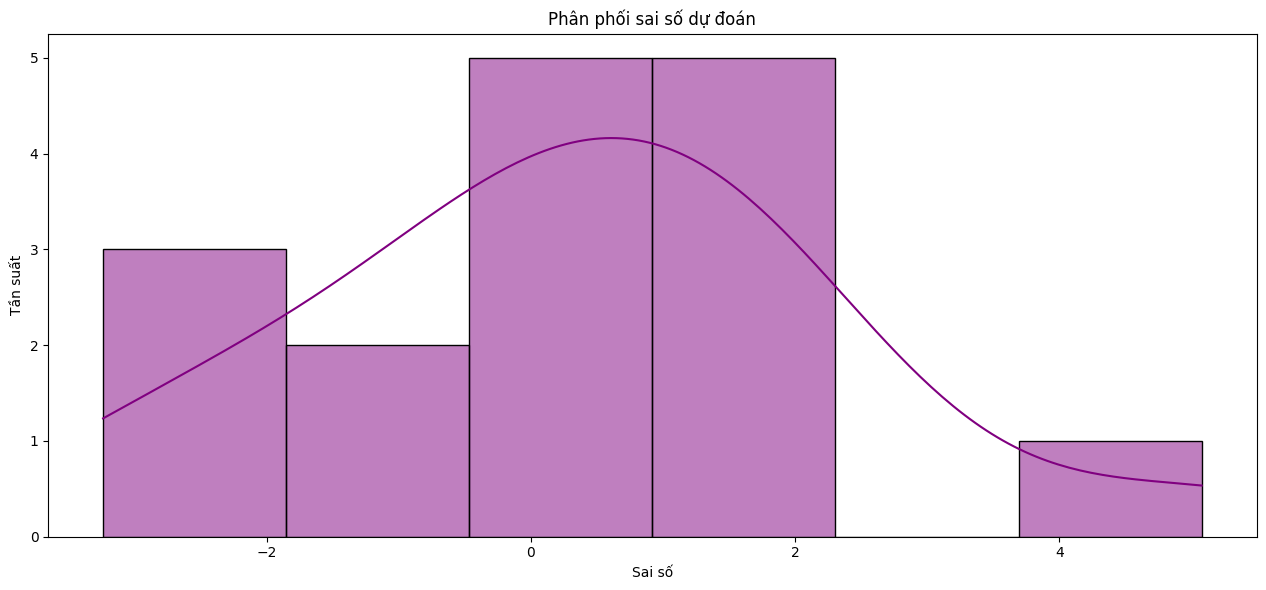

In [1200]:
# Biểu đồ phân phối sai số dự đoán
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 2)
errors = y_test - y_pred
sns.histplot(errors, kde=True, color='purple')
plt.xlabel('Sai số')
plt.ylabel('Tần suất')
plt.title('Phân phối sai số dự đoán')

plt.tight_layout()
plt.show()

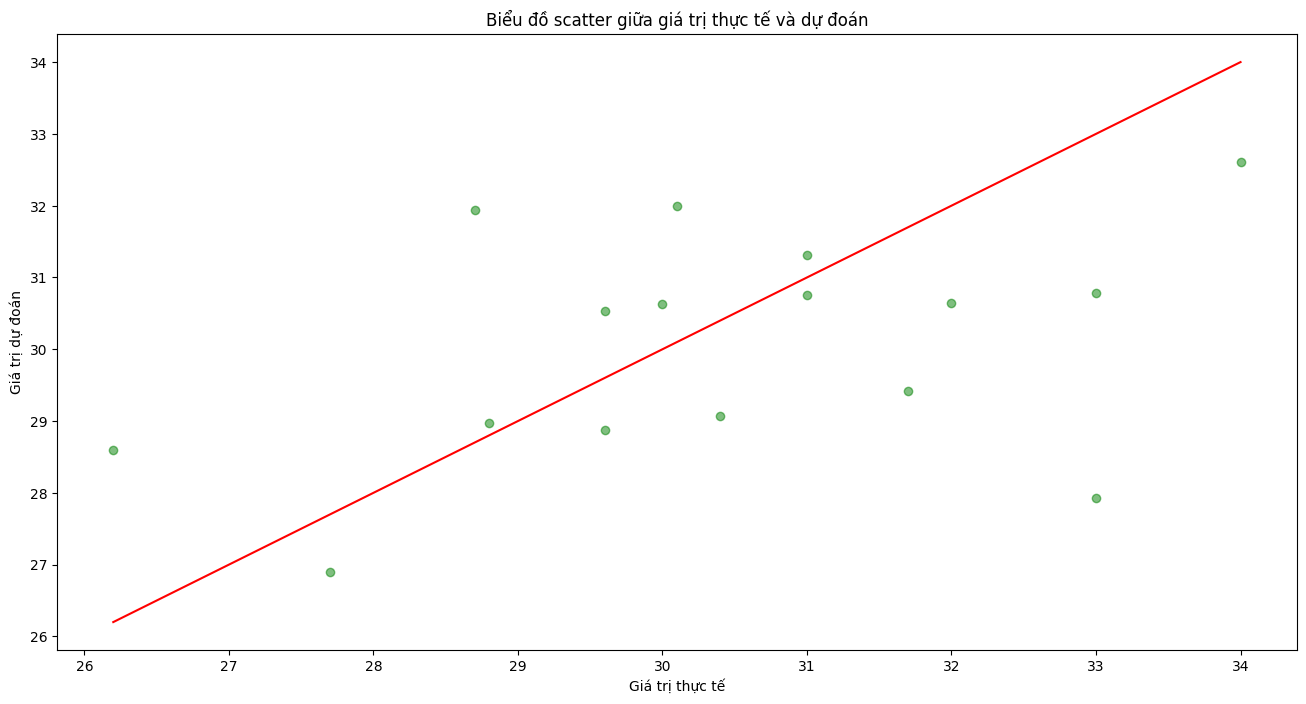

In [1201]:
# Biểu đồ scatter plot giữa giá trị thực tế và dự đoán
plt.figure(figsize=(16, 8))
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('Biểu đồ scatter giữa giá trị thực tế và dự đoán')
plt.show()

In [1202]:
# Tạo một DataFrame mới với dữ liệu cuối cùng
new_data = pd.DataFrame(last_data_point).transpose()

# Tiền xử lý dữ liệu mới
new_data_scaled = scaler.transform(new_data)

# Dự đoán nhiệt độ cao nhất cho ngày 01/05/2024
predicted_temperature = best_ridge.predict(new_data_scaled)

print("Dự đoán nhiệt độ cao nhất cho ngày 01/05/2024 là:", predicted_temperature[0])

Dự đoán nhiệt độ cao nhất cho ngày 01/05/2024 là: 27.606373177192992


c:\Users\DEll\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


<Axes: xlabel='datetime'>

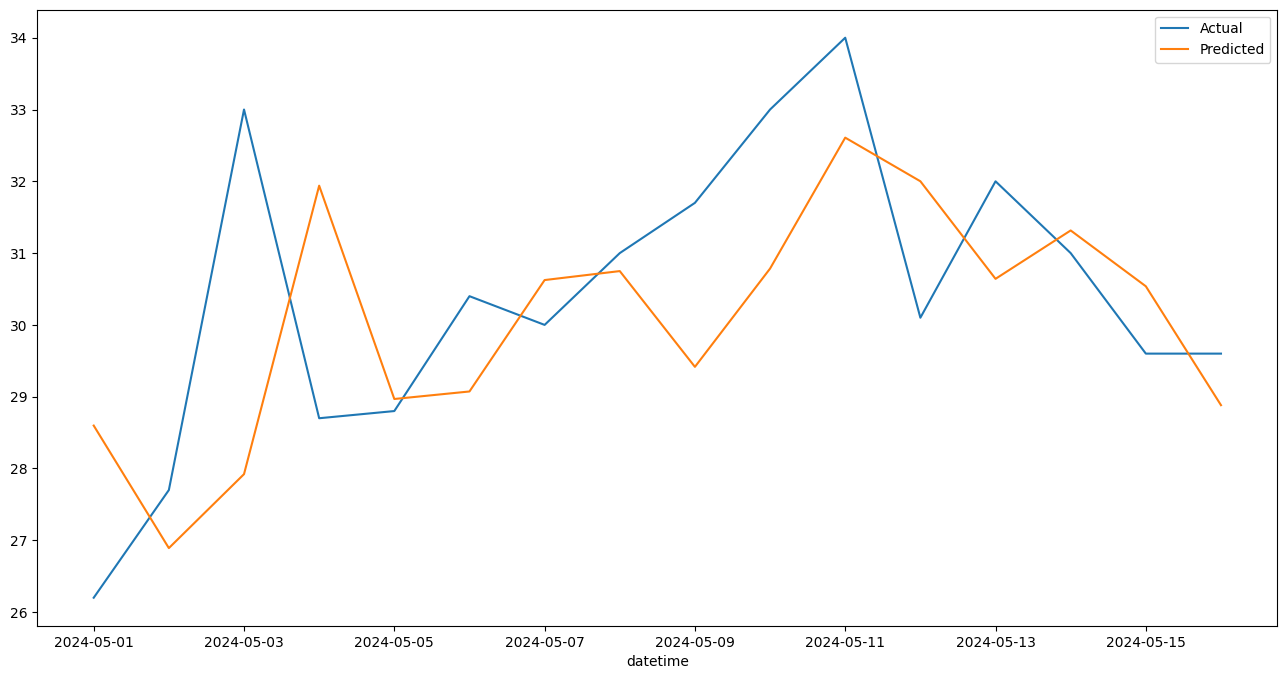

In [1203]:

combined.plot(figsize=(16,8))